In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

print(cur_path)

/home/aman/Documents/BTP/Traffic sign classification


In [3]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = sorted(os.listdir(path))

    for a in images:
        try:
            temp = path + '/' + a
            image = Image.open(temp)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
    


In [4]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
len(y_train)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


31367

In [6]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [7]:

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [8]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
491/491 [==============================] - 87s 177ms/step - loss: 2.9882 - accuracy: 0.3036 - val_loss: 1.0661 - val_accuracy: 0.7243
Epoch 2/15
491/491 [==============================] - 79s 160ms/step - loss: 1.1999 - accuracy: 0.6542 - val_loss: 0.5650 - val_accuracy: 0.8444
Epoch 3/15
491/491 [==============================] - 79s 161ms/step - loss: 0.8328 - accuracy: 0.7538 - val_loss: 0.3684 - val_accuracy: 0.9037
Epoch 4/15
491/491 [==============================] - 79s 161ms/step - loss: 0.6942 - accuracy: 0.7913 - val_loss: 0.2746 - val_accuracy: 0.9217
Epoch 5/15
491/491 [==============================] - 87s 177ms/step - loss: 0.5951 - accuracy: 0.8212 - val_loss: 0.2249 - val_accuracy: 0.9308
Epoch 6/15
491/491 [==============================] - 104s 212ms/step - loss: 0.5513 - accuracy: 0.8315 - val_loss: 0.2231 - val_accuracy: 0.9322
Epoch 7/15
491/491 [==============================] - 97s 198ms/step - loss: 0.4913 - accuracy: 0.8504 - val_loss: 0.1891 - val_a

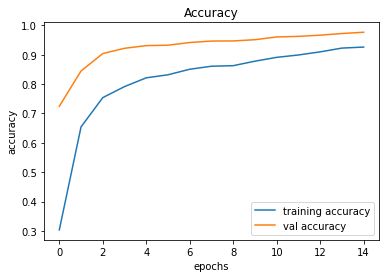

In [9]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

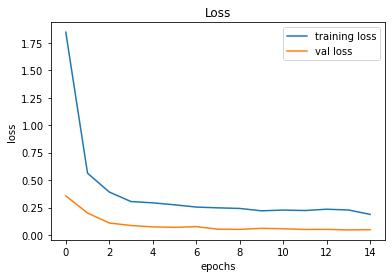

In [11]:

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:

#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)
pred = model.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [13]:


#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


0.9593824228028504


In [15]:
model.save('traffic_classifier.h5')